# EmotionAI
---

## Hugging Face Datasets
---

In [54]:
!pip install datasets -qq

In [55]:
import huggingface_hub
import datasets
dir(datasets)

['Array2D',
 'Array3D',
 'Array4D',
 'Array5D',
 'ArrowBasedBuilder',
 'Audio',
 'AudioClassification',
 'AutomaticSpeechRecognition',
 'BeamBasedBuilder',
 'BuilderConfig',
 'ClassLabel',
 'Dataset',
 'DatasetBuilder',
 'DatasetDict',
 'DatasetInfo',
 'DownloadConfig',
 'DownloadManager',
 'DownloadMode',
 'Features',
 'GeneratorBasedBuilder',
 'Image',
 'ImageClassification',
 'IterableDataset',
 'IterableDatasetDict',
 'LanguageModeling',
 'Metric',
 'MetricInfo',
 'NamedSplit',
 'NamedSplitAll',
 'QuestionAnsweringExtractive',
 'ReadInstruction',
 'Sequence',
 'Split',
 'SplitBase',
 'SplitDict',
 'SplitGenerator',
 'SplitInfo',
 'StreamingDownloadManager',
 'SubSplitInfo',
 'Summarization',
 'TaskTemplate',
 'TextClassification',
 'Translation',
 'TranslationVariableLanguages',
 'Value',
 'VerificationMode',
 'Version',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'arrow_dataset',
 '

In [56]:
print(f"Total Hugging Face Datasets: {len(datasets.list_datasets())}")

Total Hugging Face Datasets: 82245


### Load Dataset

#### Load Dataset from the Hugging Face Hub

In [57]:
from datasets import load_dataset

In [58]:
data = load_dataset(
    path = "emotion"
)

print(data)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


#### Load the dataset from other than Hugging Face hub

```python
csv -> load_dataset("csv", data_files="my_file.csv")
text -> load_dataset("text", data_files="my_file.txt")
json -> load_dataset("json", data_files="my_file.jsonl")
```
* We can also use other arguments like `sep` if there is different `delimiter` in csv file.
* We can also use the arguments like `names` to provide the `list` of column names.

### Change data format from Dataset object to Pandas Dataframe

In [59]:
data["train"].to_pandas()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [60]:
data["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [61]:
data["train"].column_names

['text', 'label']

In [62]:
train = data["train"].to_pandas()
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [63]:
def label_int2str(row):
  return data["train"].features["label"].int2str(row)

In [64]:
train["label_name"] = train["label"].apply(
    func = label_int2str
)
train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Look at Class Distribution

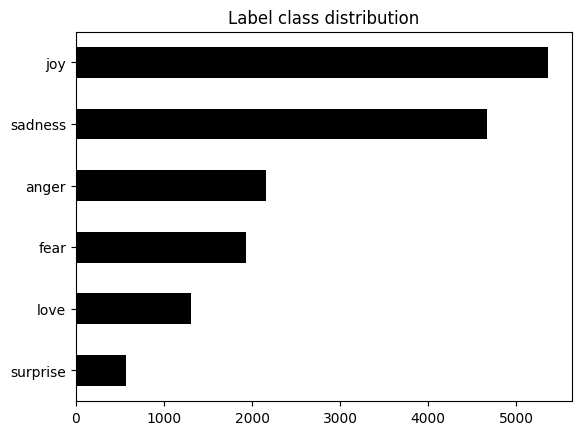

In [65]:
import matplotlib.pyplot as plt
train["label_name"].value_counts(ascending=True).plot.barh(
    grid = False,
    color = "black"
)
plt.title("Label class distribution")
plt.show()

The `joy` and `sadness` classes appear frequently, whereas `love` and `surprise` are about 5-10 times rarer.

How to deal with Imbalanced Data?
* Randomly oversample the Minority class.
* Randomly undersample the Majority class.
* Gather more labelled data from the underrepresented class.

> Never apply any sampling techniques before `Train-Test Split` of the data else it will cause data leakage.

### How long are the tweets?

**Tokens** are like atoms, they are the smallest unit of text.

* **Word Tokens** where each word is like an atom that forms a text.
* **Character Tokens** where each character is like an atom that forms a text.

> Transformers models have a disadvantage that is it can only take upto a certain amount of input tokens which is referred by `maximum context size`. **DistilBERT** has a `maximum context size` of 512.


#### What if input sequence > maximum context size of the model?
Then we have to `truncate` all the tokens after the maximum context size (512) and if those truncated tokens represent some important information then there will be `performance loss`.

In [66]:
train["text"].str.split() # Each word acts as a token

0                             [i, didnt, feel, humiliated]
1        [i, can, go, from, feeling, so, hopeless, to, ...
2        [im, grabbing, a, minute, to, post, i, feel, g...
3        [i, am, ever, feeling, nostalgic, about, the, ...
4                                [i, am, feeling, grouchy]
                               ...                        
15995    [i, just, had, a, very, brief, time, in, the, ...
15996    [i, am, now, turning, and, i, feel, pathetic, ...
15997                [i, feel, strong, and, good, overall]
15998    [i, feel, like, this, was, such, a, rude, comm...
15999    [i, know, a, lot, but, i, feel, so, stupid, be...
Name: text, Length: 16000, dtype: object

In [67]:
train["text"].str.split().apply(len) # Total no. of tokens in a text/tweet

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: text, Length: 16000, dtype: int64

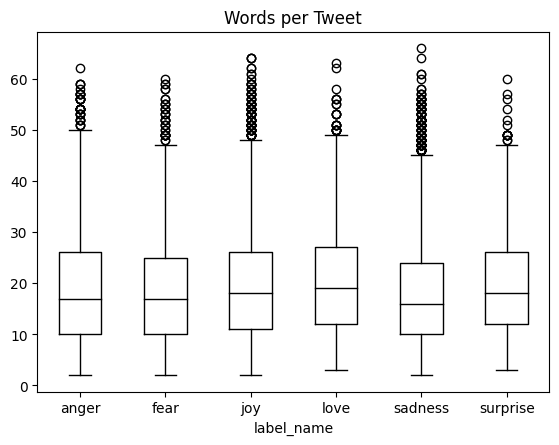

In [68]:
train["words_per_tweet"] = train["text"].str.split().apply(len)
train.boxplot(
    "words_per_tweet",
    by = "label_name",
    grid = False,
    color = "black",
    showfliers = 1
)

plt.title("Words per Tweet")
plt.suptitle("")
plt.show()

From the above plot we can say that the average words per tweet is about `15`, the maximum is near `70` which is way below than our `DistilBERT` model's maximum context size that is `512`. Therefore, we don't have to perform truncation.

## Text to Tokens

Well we can't feed raw strings to our Transformers Models as they need `numbers` to do their magic, and hence, we need to `tokenize` and `encode` the raw input strings.

* **Character Tokens :** Each character as input
* **Word Tokens :** Each word as input
* **Subword Tokens :** Splits words based on their frequency and meaning.

### Steps: Text to input tokens
1. **Tokenization:** Converting full texts into tokens that are like atoms,building blocks like character, word, subword.

2. **Numericalization:** Mapping those tokens into unique identifier known as `input_ids`.

3. **One Hot Encoding:** Converting those `1D input_ids` to `2D Tensors`, and one hot encoding is known for converting categorical values to numerical, it also removes any kind of `ordinal` or `nominal` present in the `1D input_ids`.

> Neural Networks are very good at learning those `ordinal` or `nominal` kinds of relationships present in any data and hence the **One Hot Encoding** is done to convert them from `1D` to `2D Tensors`.

### Character Tokens
```python
character_tokens = list(text)
```

In character tokenization we feed **each character** as input to the model.

In [69]:
# Character Level Tokenization
text : str = "Hi, I am learning about character level tokenization..."

print("Character Level Tokenization")
ch_tokens = list(text)
print(ch_tokens)

Character Level Tokenization
['H', 'i', ',', ' ', 'I', ' ', 'a', 'm', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'a', 'b', 'o', 'u', 't', ' ', 'c', 'h', 'a', 'r', 'a', 'c', 't', 'e', 'r', ' ', 'l', 'e', 'v', 'e', 'l', ' ', 't', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n', '.', '.', '.']


This ain't enough. After tokenization we need to do `numericalization`, before feeding them into the model.

* **Numericalization** is conversion to Numericals.


In [70]:
token2int = {ch:i for i, ch in enumerate(sorted(set(ch_tokens)))}

print("Token to integer mapping")
print(token2int)

print("\nInput Ids")
input_ids = [token2int[token] for token in ch_tokens]
print(input_ids)

Token to integer mapping
{' ': 0, ',': 1, '.': 2, 'H': 3, 'I': 4, 'a': 5, 'b': 6, 'c': 7, 'e': 8, 'g': 9, 'h': 10, 'i': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'r': 17, 't': 18, 'u': 19, 'v': 20, 'z': 21}

Input Ids
[3, 11, 1, 0, 4, 0, 5, 14, 0, 13, 8, 5, 17, 15, 11, 15, 9, 0, 5, 6, 16, 19, 18, 0, 7, 10, 5, 17, 5, 7, 18, 8, 17, 0, 13, 8, 20, 8, 13, 0, 18, 16, 12, 8, 15, 11, 21, 5, 18, 11, 16, 15, 2, 2, 2]


Each token has been mapped to `unique numerical identifier` and hence the name **`input_ids`**.

#### 1D Input Ids to 2D Tensors

In [71]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(
    data = input_ids
)

one_hot_encoding = F.one_hot(
    input = input_ids,
    num_classes = len(token2int)
)

one_hot_encoding.shape

torch.Size([55, 22])

For each `55 tokens` (input_ids) we have one-hot-vector of `22` dimensions which is the size our vocabulary(`token2int`) that contains 22 unique characters.

> Always set `num_classes` in the `one_hot()` function else one-hot vectors may end up being shorter than the length of the vocabulary and need to be padded with zeros manually.

In [72]:
one_hot_encoding

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 1,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0]])

In [73]:
print(f"Character Tokens: {ch_tokens[6]}")
print(f"Numericalization-Input Ids: {input_ids[6]}")
print(f"OHE Vector: {one_hot_encoding[6]}")

Character Tokens: a
Numericalization-Input Ids: 5
OHE Vector: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


#### Advantages
* Character Level Tokenization helps to deal with Misspellings and Rare Words.

#### Disadvantages
* Character Level Tokenization ignores any structure in the text and treats the whole text as stream of characters.
* The main drawback is that we need to learn the `words` from the `characters` which significant compute power, memory and data, and for this reason it's rarely used in practice.

To solve this, `Word Tokenization` comes into play.


### Word Tokenization

```python
word_tokenization = text.split()
```

Instead of splitting each character we directly `split each word` and `map` them to unique integers.

* It's less complex than character tokenization as we skip the part where we used characters to learn the words.

In [74]:
word_tokenization = text.split()

print("Word Tokenization")
print(word_tokenization)

Word Tokenization
['Hi,', 'I', 'am', 'learning', 'about', 'character', 'level', 'tokenization...']


#### Disadvantage

* Word Tokenization doesn't care about punctuations.

Note that in the token: `tokenization...`, the punctuation `...` are also included inside the same token only.

Other rules are:

* `stemming` or `lemmatization`, which normalizes words to their stem (e.g., “great”, “greater”, and “greatest” all become “great”), at the expense of losing some information in the text.

### Subword Tokenization

In Subword Tokenization we split the text based on their `frequency` and `meaning`. We take best of both worlds - Character and Word Tokenization.

* Famous algorithms are `SentencePiece`, Byte-Pair Encoding (BPE),WordPiece.

* `WordPiece` subword tokenization algorithm is used by the tokenizers of BERT & DistilBERT.

#### AutoTokenizer
Is a `class` provided by Transformers, by which we can call the Tokenizers that are associated with the `pre-trained` models with the help of `.from_pretrained()` method.

`AutoTokenizer` class belongs to a larger set of class `auto`, whose job is to `automatically` retrieve model's configuration, weights, vocabulary using the model's checkpoint.

In [75]:
from transformers import AutoTokenizer

model_checkpoint = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path = model_checkpoint
)

In [76]:
print(text, "\n")

enocded_text = tokenizer(text)
print(enocded_text)

Hi, I am learning about character level tokenization... 

{'input_ids': [101, 7632, 1010, 1045, 2572, 4083, 2055, 2839, 2504, 19204, 3989, 1012, 1012, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [77]:
# Instead of Automatically fetching tokenizers we can use Class Specific Tokenizers also
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained(
    pretrained_model_name_or_path = model_checkpoint
)

In [78]:
print(text, "\n")

enocded_text = tokenizer(text)
print(enocded_text)

Hi, I am learning about character level tokenization... 

{'input_ids': [101, 7632, 1010, 1045, 2572, 4083, 2055, 2839, 2504, 19204, 3989, 1012, 1012, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


> When we load the tokenizers data first time using `.from_pretrained()`, it downloads it from the hub and saves it into `~/.cache/huggingface`, and when we second time run it it justs loads it from the the directory `~/.cache/huggingface`.

In [79]:
# Let's see what's in the directory
!ls ~/.cache/huggingface

datasets  hub  modules


#### Input Ids to Tokens

Remember?
* Tokenization : Text to tokens
* Numericalization : Tokens to Integers mapping (Vocabulary) using token2int
* Encoding : From vocabulary to `input_ids` it's the same thing that we get here,

```python
{
  'input_ids': [101, 7632, 1010, 1045, 2572, 4083, 2055, 2839, 2504, 19204, 3989, 1012, 1012, 1012, 102],
  
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

```



In [80]:
# convert input_ids back to token
back_to_tokens = tokenizer.convert_ids_to_tokens(
    ids = enocded_text["input_ids"]
)

print("Converted back to tokens")
print(back_to_tokens)

Converted back to tokens
['[CLS]', 'hi', ',', 'i', 'am', 'learning', 'about', 'character', 'level', 'token', '##ization', '.', '.', '.', '[SEP]']


> The main role of `[CLS]` and `[SEP]` is to indicate start and end of sentence. They are added by the tokenizer and differs from model to model.

> The `##` in `##ization` is a prefix which indicates that the preceding word is `not a whitespace`. And we should keep it in mind to concatenate such words with the preceding word while converting them back to the original text/string. The method `.convert_tokens_to_string()` is for that job.

In [81]:
tokens_to_strings = tokenizer.convert_tokens_to_string(
    back_to_tokens
)

print("Tokens to Text/String")
print(tokens_to_strings)

Tokens to Text/String
[CLS] hi , i am learning about character level tokenization . . . [SEP]


In [82]:
print("Vocabulary Size (token2int dict)")
print(tokenizer.vocab_size)

Vocabulary Size (token2int dict)
30522


In [83]:
print("Model's Max Context Size")
print(tokenizer.model_max_length)

Model's Max Context Size
512


In [84]:
print("Input Fields that the Model expects in it's Forward Pass")
print(tokenizer.model_input_names)

Input Fields that the Model expects in it's Forward Pass
['input_ids', 'attention_mask']


> Make sure to use the `same tokenizer` that was used by the pretrained model.

### Tokenize the Whole Dataset
> Note that: here, `Tokenize` means converting Text to tokens to vocabulary to input_ids. And not just text to tokens.

In [86]:
def tokenize(batch):
  return tokenizer(batch["text"], padding = True, truncation = True)

`padding = True` will pad the examples with `zeros` to the size of the longest one in a batch. Aim is to make each example of the same size

`truncation = True` will make sure that the examle size is not more than the model's `maximum context size`.

In [98]:
tokenize(data["train"][:2]) # let's check the first two text

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

```python
{
  'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]],
  'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
}
```

The `attention_mask` makes sure that the model doesn't get confuse with the padding and ignore them.

In [102]:
print(tokenize(data["train"][:2])["input_ids"][0])
print(tokenize(data["train"][:2])["attention_mask"][0])

[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [105]:
# Apply the data preprocessing function to all the splites in Dataset all at once
encoded_data = data.map(
    function = tokenize,
    batched = True,
    batch_size = None
  )

Because we've set `batch_size=None`, our `tokenize()` function will be applied on the full dataset as a single batch which ensures that the input tensors and attention masks have the `same shape globally`.

In [109]:
encoded_data["train"].to_pandas().head()

,text,label,input_ids,attention_mask
0,i didnt feel humiliated,0,"[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,i can go from feeling so hopeless to so damned...,0,"[101, 1045, 2064, 2175, 2013, 3110, 2061, 2062...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,im grabbing a minute to post i feel greedy wrong,3,"[101, 10047, 9775, 1037, 3371, 2000, 2695, 104...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
3,i am ever feeling nostalgic about the fireplac...,2,"[101, 1045, 2572, 2412, 3110, 16839, 9080, 128...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,i am feeling grouchy,3,"[101, 1045, 2572, 3110, 24665, 7140, 11714, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."


Note that, two new features `input_ids` and `attention_mask` has been added to the whole dataset.

## Training a Text Classifier

We have two options to train such models (DistilBERT) on twitter dataset:
1. **Feature Extractor** - Don't modify the pretrained model. Just use `hidden state` as features and train the classifier on the data

2. **Fine Tuning** - Modify the whole pretrained model. Train the model end to end on the data and update all it's weights and parameters.

### Fine-Tuning Transformers